In [1]:
import sys
import project1
sys.path.append('code')  # go up one folder, then into code
import registration_util as util
import registration as reg
import matplotlib.pyplot as plt
from skimage import io, transform
import numpy as np

In [ ]:


X_fixed= 'image_data/3_2_t1.tif'
X_move= 'image_data/3_2_t1_d.tif'

X, Xm = util.cpselect(X_fixed, X_move)

Xh = util.c2h(X)
Xmh = util.c2h(Xm)

# Step 2: Compute the affine transformation matrix
A = reg.ls_affine(Xh, Xmh)

I_fixed = plt.imread(X_fixed)
I_move = plt.imread(X_move)

# Step 5: Apply the affine transformation
I_registered, Xt = reg.image_transform(I_move, A, output_shape=None)

# Step 6: Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Fixed Image")
plt.imshow(I_fixed, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Original Moving Image")
plt.imshow(I_move, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Registered Image")
plt.imshow(I_registered, cmap='gray')

print(reg.correlation(I_fixed, I_registered))

plt.tight_layout()
plt.show()


# Task 2

KeyboardInterrupt: 

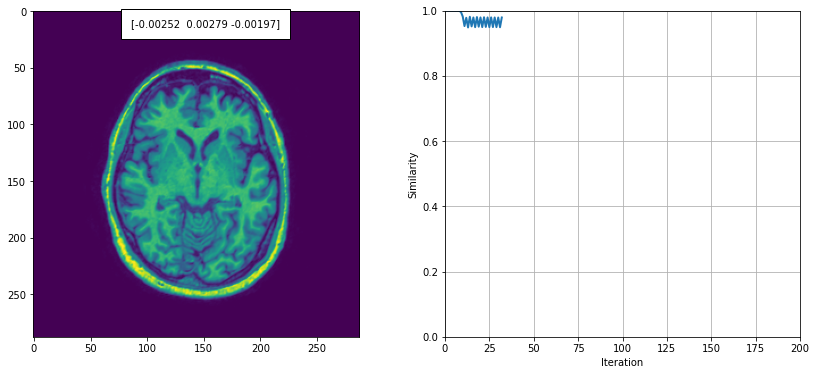

In [ ]:
#Rigid intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

s1 = "1_1_t1"
s2 = "1_1_t1_d"

project1.intensity_based_registration_rigid(s1, s2);

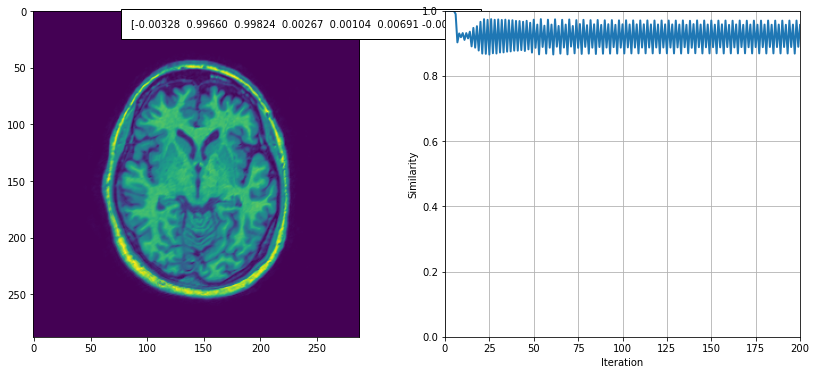

In [ ]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t1_d")

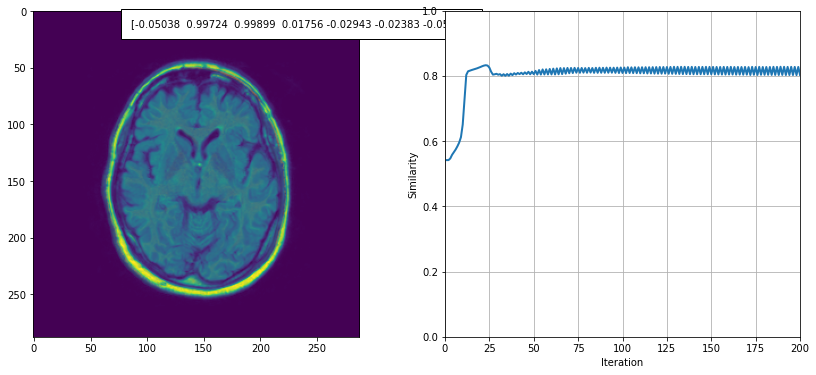

In [ ]:
#Affine intensity-based registration of a T1 and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using normalized 
#cross-correlation as a similarity measure.

project1.intensity_based_registration_affine("1_1_t1", "1_1_t2")

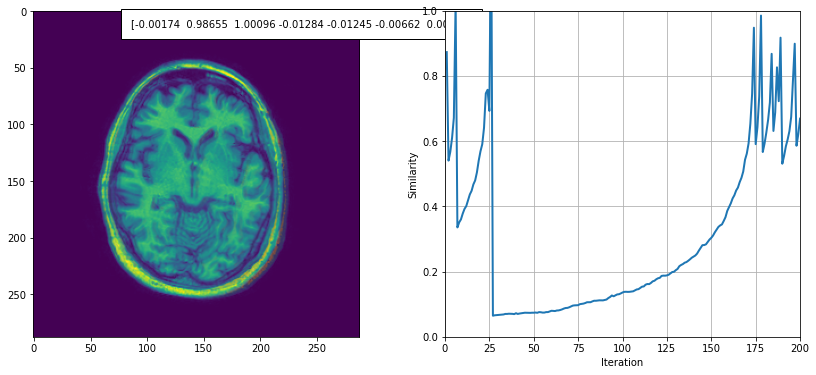

In [ ]:
#Affine intensity-based registration of two T1 slices 
#(e.g. 1_1_t1.tif and 1_1_t1_d.tif) using mutual information 
#as a similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t1_d")

In [ ]:
#Affine intensity-based registration of a T1 slice and a T2 slice 
#(e.g. 1_1_t1.tif and 1_1_t2.tif) using mutual information as a 
#similarity measure.

project1.intensity_based_registration_affine_mi("1_1_t1", "1_1_t2")

FileNotFoundError: [Errno 2] No such file or directory: '../data/image_data/1_1_t1.tif'

# Open ended project work

Research question: 

What is the impact of Gaussian noise on an MR image on the similarity measure using normalized cross-correlation?


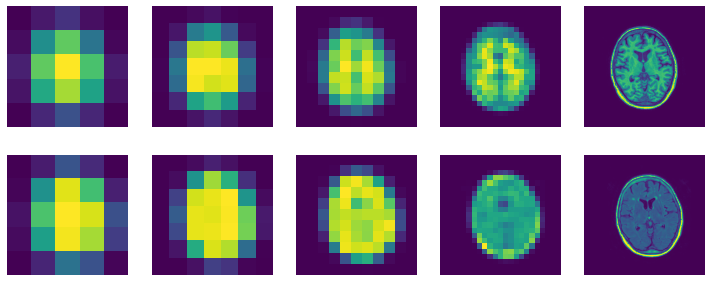

In [10]:
tIm = plt.imread('image_data/3_2_t1.tif')
rIm = plt.imread('image_data/3_2_t2.tif')

stack_original = project1.downsampler(4, 50, tIm)
stack_rotated = project1.downsampler(4, 50, rIm)

num_images = len(stack_original)

# Create a figure with a row of subplots
fig, axs = plt.subplots(2, num_images, figsize=((5 * num_images)/2, 5))

for i, img in enumerate(stack_original):
    axs[0,i].imshow(img)
    axs[1,i].imshow(stack_rotated[i])
    axs[0,i].axis('off')  # Hide axes
    axs[1,i].axis('off')  # Hide axes

plt.show()

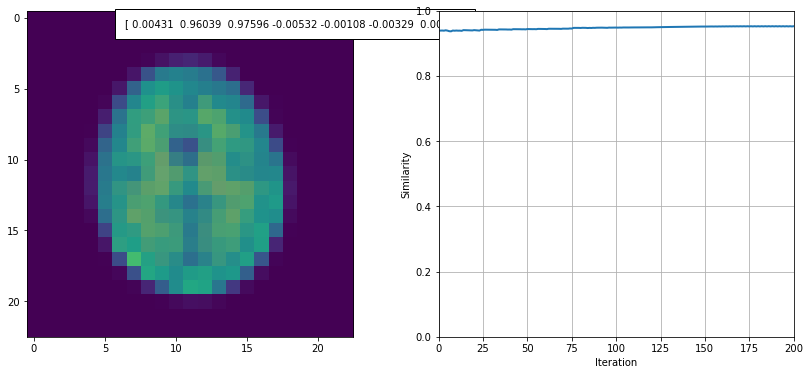

0.9522278863303795
[[ 0.9603844  -0.00931877 -0.32935822]
 [ 0.00308794  0.97592413  0.47505952]
 [ 0.          0.          1.        ]]


c:\Users\20212144\Anaconda3\envs\8be030_venv\lib\site-packages\matplotlib\cbook\__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

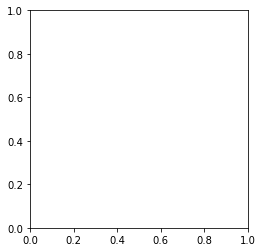

In [ ]:
#Th = project1.intensity_based_registration_affine_th(stack_original[3], stack_rotated[3])
print(reg.image_transform(stack_rotated[4],Th).type)
plt.imshow(reg.image_transform(stack_rotated[4],Th))  #stack_rotated[4].dot(Th))